### **Implementation of VGG-16**
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-Deep-Learning-Hands-on-NOC24EE04-/blob/main/ConvNets/VGG16.ipynb)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
import tensorflow as tf

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


### **VGG16 model creation**
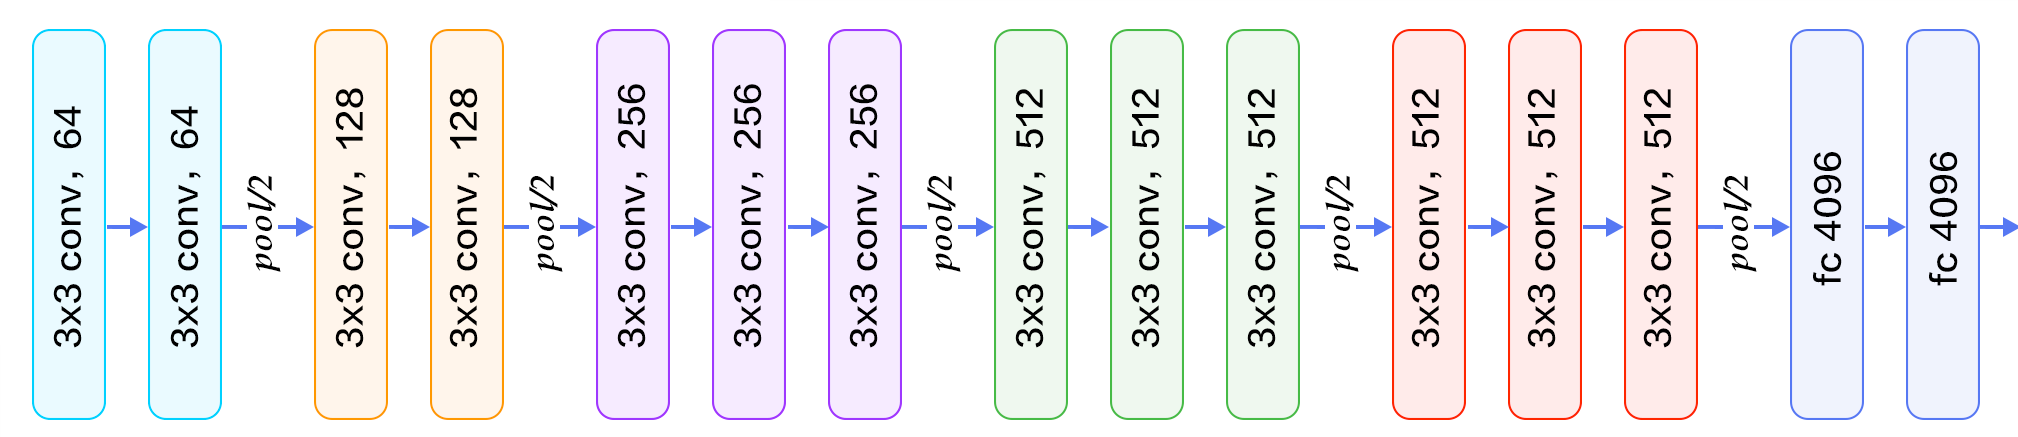

In [5]:
# VGG-16 model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [6]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/5
375/375 [==============================] - 17s 39ms/step - loss: 0.2929 - accuracy: 0.9007 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 2/5
375/375 [==============================] - 14s 38ms/step - loss: 0.0589 - accuracy: 0.9831 - val_loss: 0.0555 - val_accuracy: 0.9859
Epoch 3/5
375/375 [==============================] - 14s 37ms/step - loss: 0.0430 - accuracy: 0.9877 - val_loss: 0.0418 - val_accuracy: 0.9886
Epoch 4/5
375/375 [==============================] - 14s 37ms/step - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0380 - val_accuracy: 0.9902
Epoch 5/5
375/375 [==============================] - 14s 38ms/step - loss: 0.0386 - accuracy: 0.9893 - val_loss: 0.0313 - val_accuracy: 0.9908


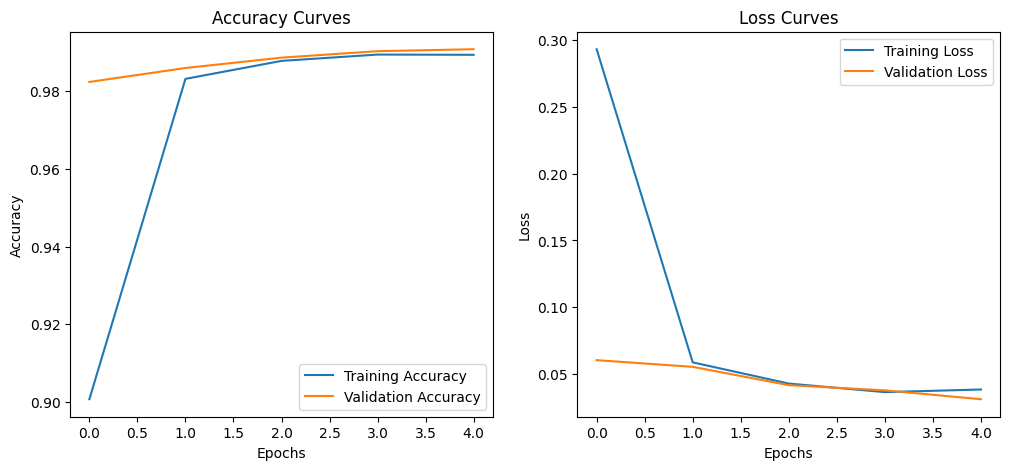

In [7]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.0272
Test Accuracy: 0.9924


313/313 [==============================] - 1s 3ms/step


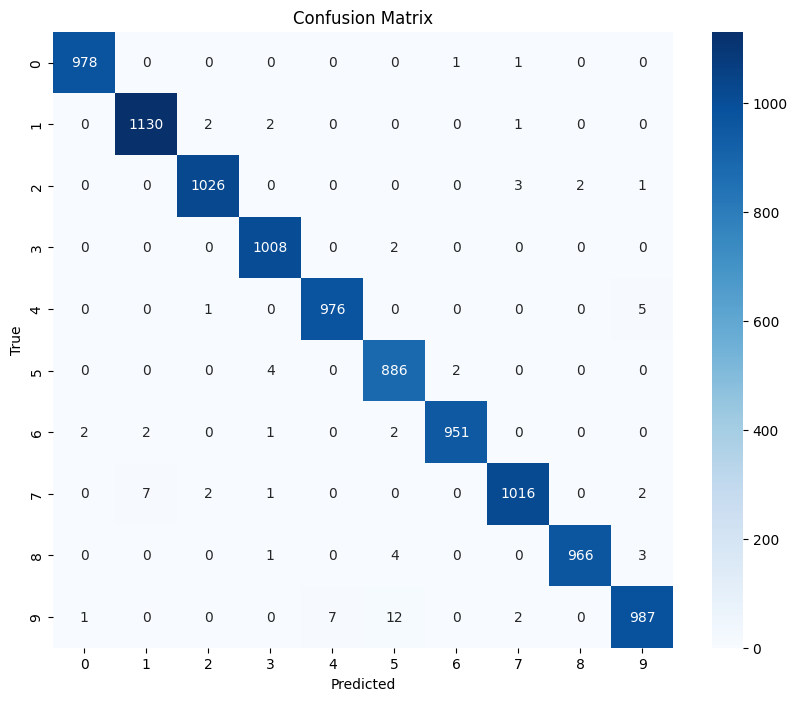

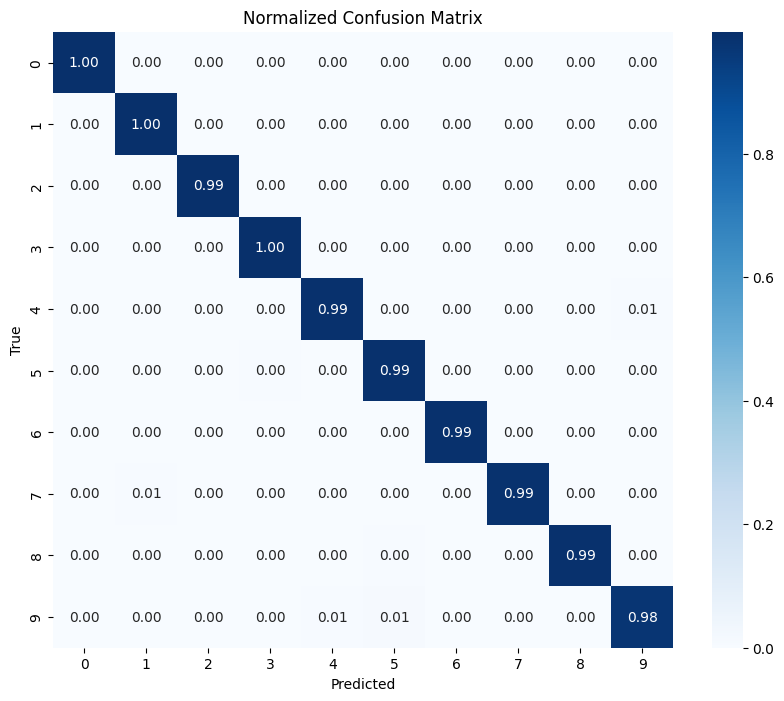

In [9]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

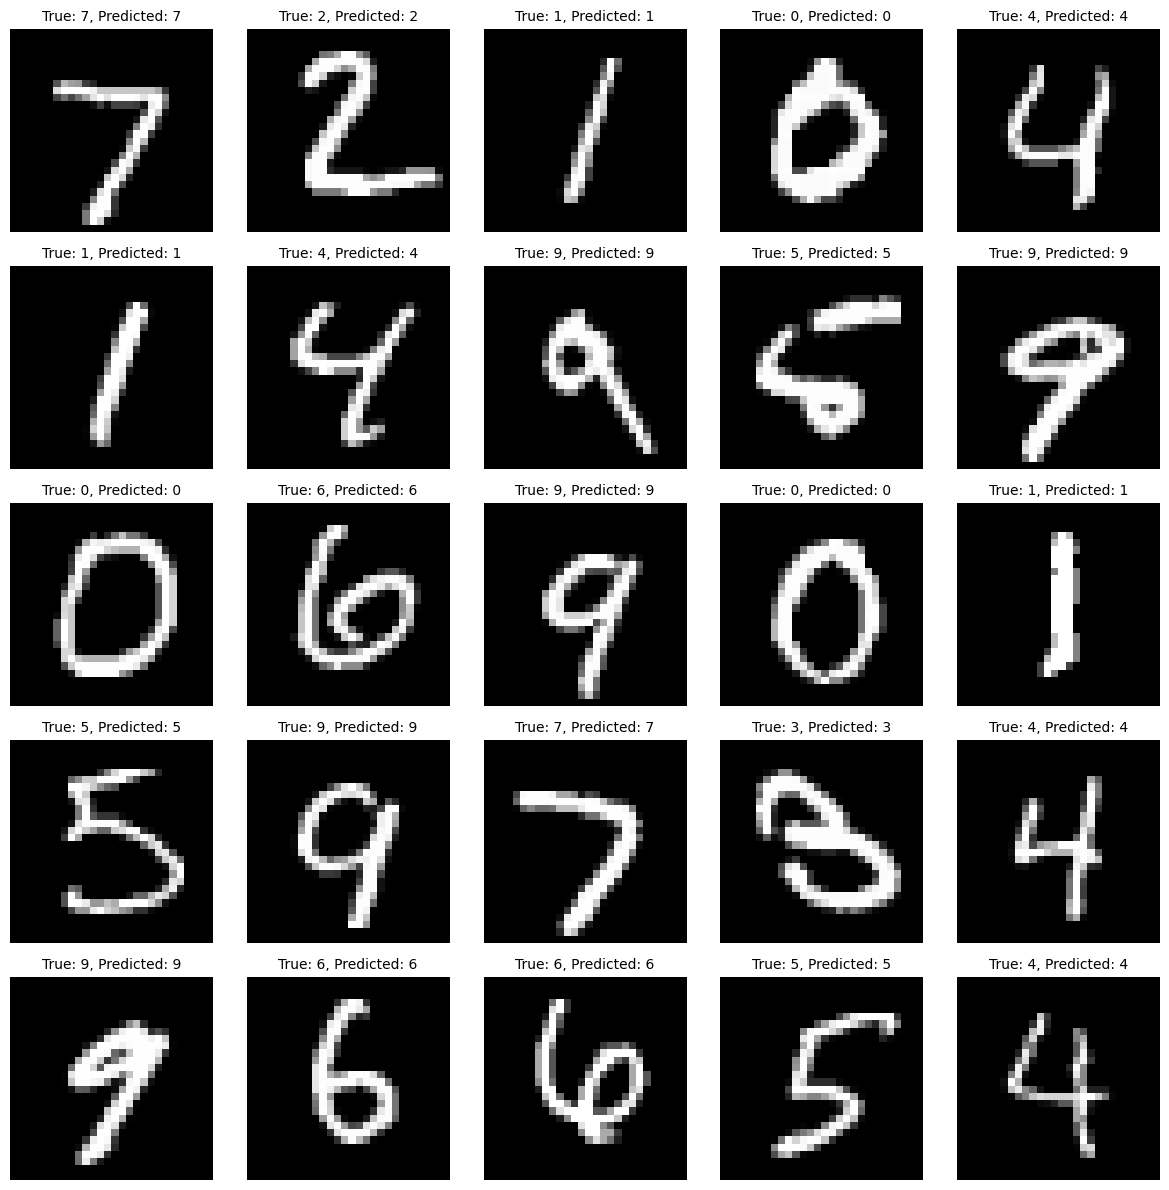

In [10]:
# Visualize classification results
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[i]}, Predicted: {y_pred[i]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

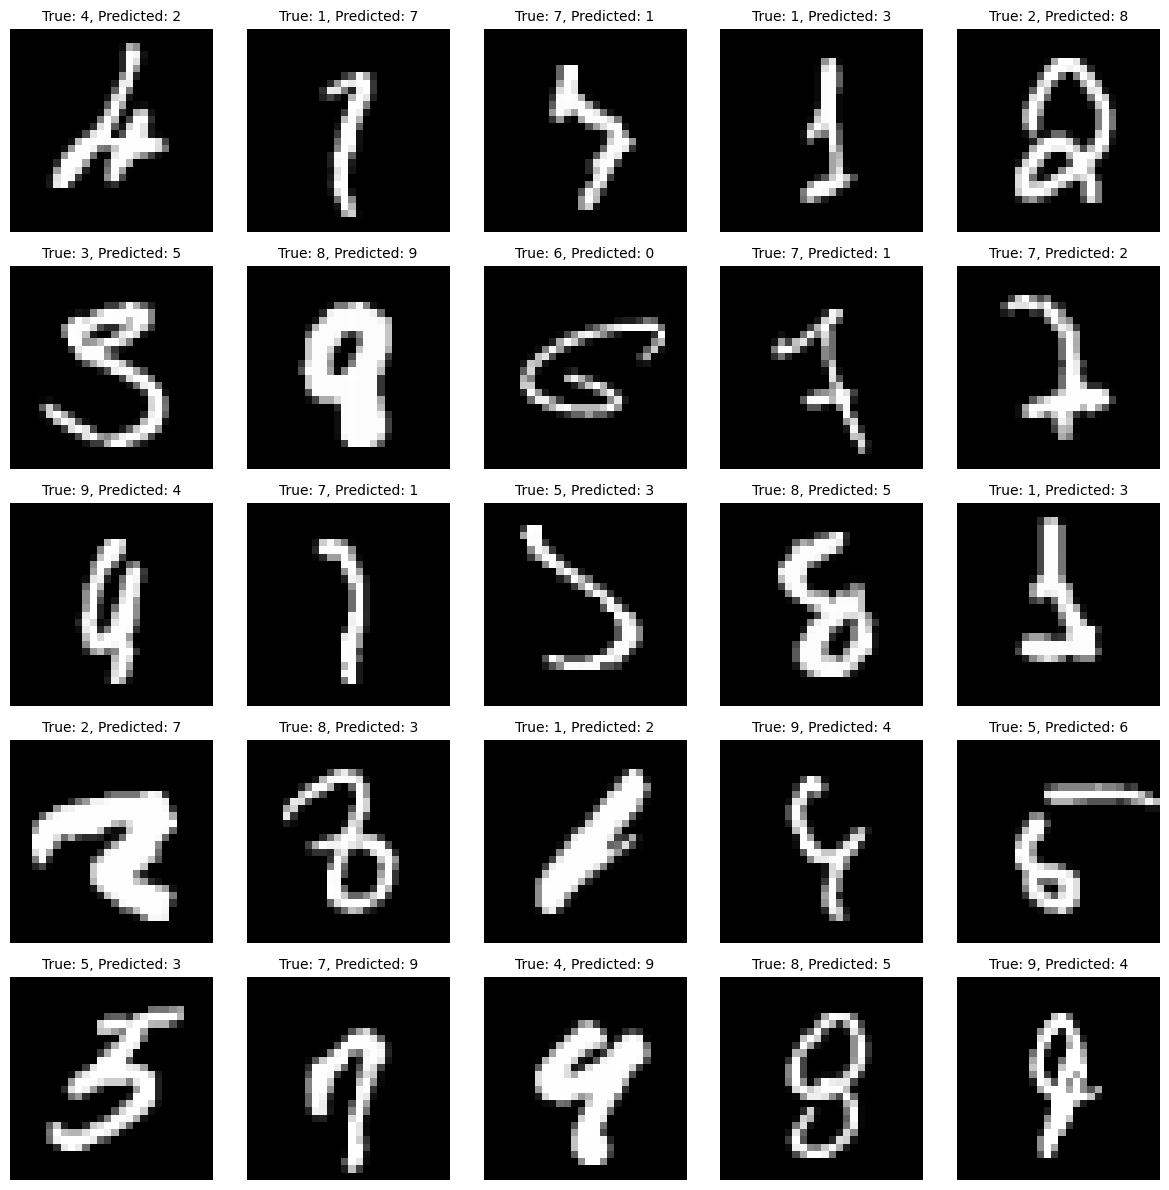

In [11]:
# Visualize misclassifications
misclassified_indices = np.where(y_pred != y_true)[0]
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[idx]}, Predicted: {y_pred[idx]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()